### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

primi 10 paesi con total_litres_of_pure_alcohol maggiore:
                 country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4
consumo medio birra: 106.16062176165804
consumo medio vino: 49.45077720207254
consumo medio distillati: 80.99481865284974
nuova colonna, alcohol_index:
        country  beer_servings  wine_servings  spirit_servings  alcohol_index
0  Afghanistan              0              0                0       0.000000
1      Albania             89           

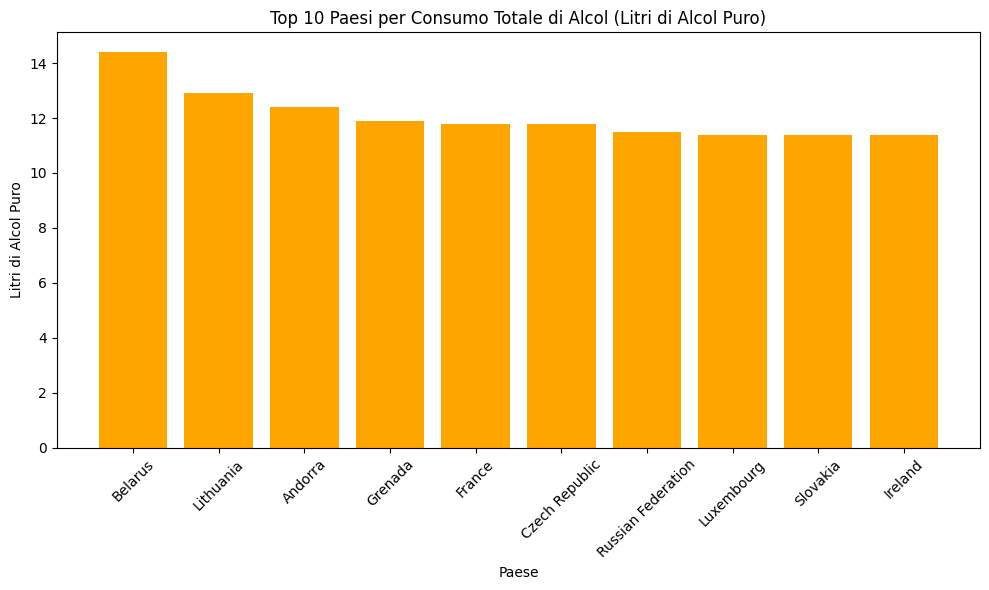

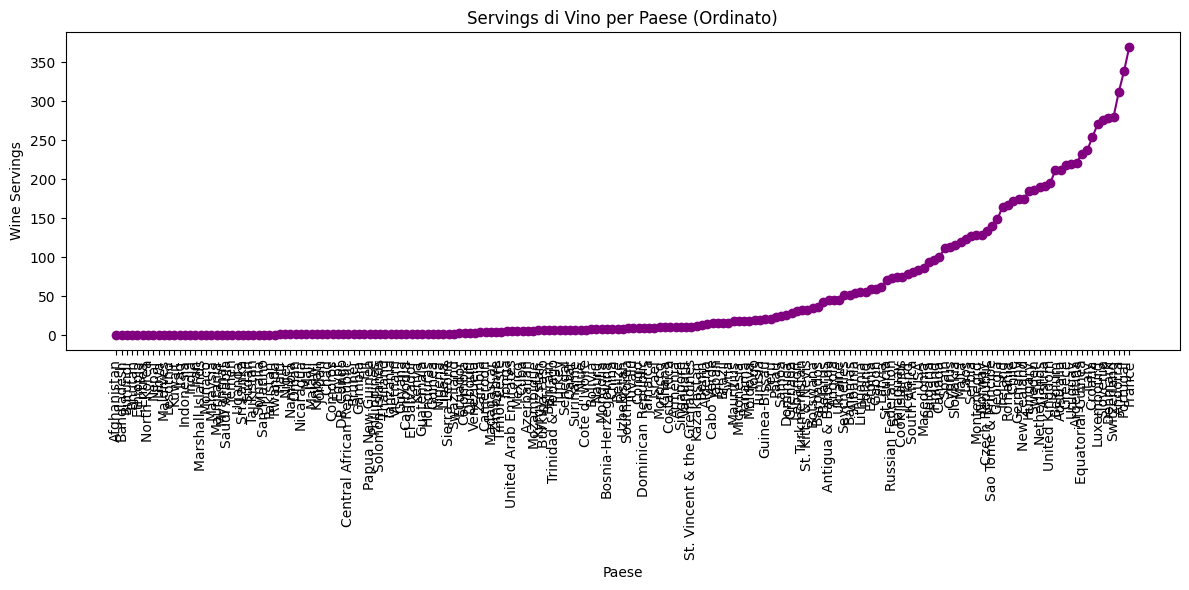

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

# 1. Visualizza i primi 10 paesi per consumo totale di alcol puro
top10_alcol = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)
print("primi 10 paesi con total_litres_of_pure_alcohol maggiore:\n",top10_alcol[['country', 'total_litres_of_pure_alcohol']])

# 2. Calcola la media del consumo di birra, vino e distillati
beer_mean = df['beer_servings'].mean()
wine_mean = df['wine_servings'].mean()
spirit_mean = df['spirit_servings'].mean()

print("consumo medio birra:", beer_mean)
print("consumo medio vino:", wine_mean)
print("consumo medio distillati:", spirit_mean)

# 3. Crea una colonna 'alcohol_index' come media dei tre tipi di consumo
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3
print("nuova colonna, alcohol_index:\n",df[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'alcohol_index']].head())

# 4. Trova il paese con il valore massimo di alcohol_index
paese_max = df.loc[df['alcohol_index'].idxmax()]
print("Paese con il massimo alcohol_index:\n", paese_max[['country', 'alcohol_index']])

# 5. Filtra solo i paesi che consumano più di 100 birre all’anno
birre100 = df[df['beer_servings'] > 100]
print("paesi che consumano più di 100 birre all'anno:\n", birre100[['country', 'beer_servings']])


# Bar Chart – Top 10 paesi per consumo totale di alcol
plt.figure(figsize=(10, 6))
plt.bar(top10_alcol['country'], top10_alcol['total_litres_of_pure_alcohol'], color='orange')
plt.title('Top 10 Paesi per Consumo Totale di Alcol (Litri di Alcol Puro)')
plt.xlabel('Paese')
plt.ylabel('Litri di Alcol Puro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Plot – Wine servings ordinato per paese
wine_sorted = df.sort_values(by='wine_servings')

plt.figure(figsize=(12, 6))
plt.plot(wine_sorted['country'], wine_sorted['wine_servings'], marker='o', linestyle='-', color='purple')
plt.title('Servings di Vino per Paese (Ordinato)')
plt.xlabel('Paese')
plt.ylabel('Wine Servings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Statistiche per Paese: 
                          salary_year_avg  job_counts  min_salary  max_salary
job_country                                                                  
Belarus                     400000.000000           1    400000.0    400000.0
Russia                      292500.000000           4    250000.0    320000.0
Bahamas                     201511.619048          21    173500.0    284016.0
Dominican Republic          157500.000000           1    157500.0    157500.0
Northern Mariana Islands    155485.500000           1    155485.5    155485.5
...                                   ...         ...         ...         ...
Honduras                     63000.000000           1     63000.0     63000.0
Bangladesh                   60981.333333           3     16500.0     97444.0
Montenegro                   53014.000000           1     53014.0     53014.0
Algeria                      44550.000000           2     44100.0     45000.0
Uzbekistan                   30750.00000

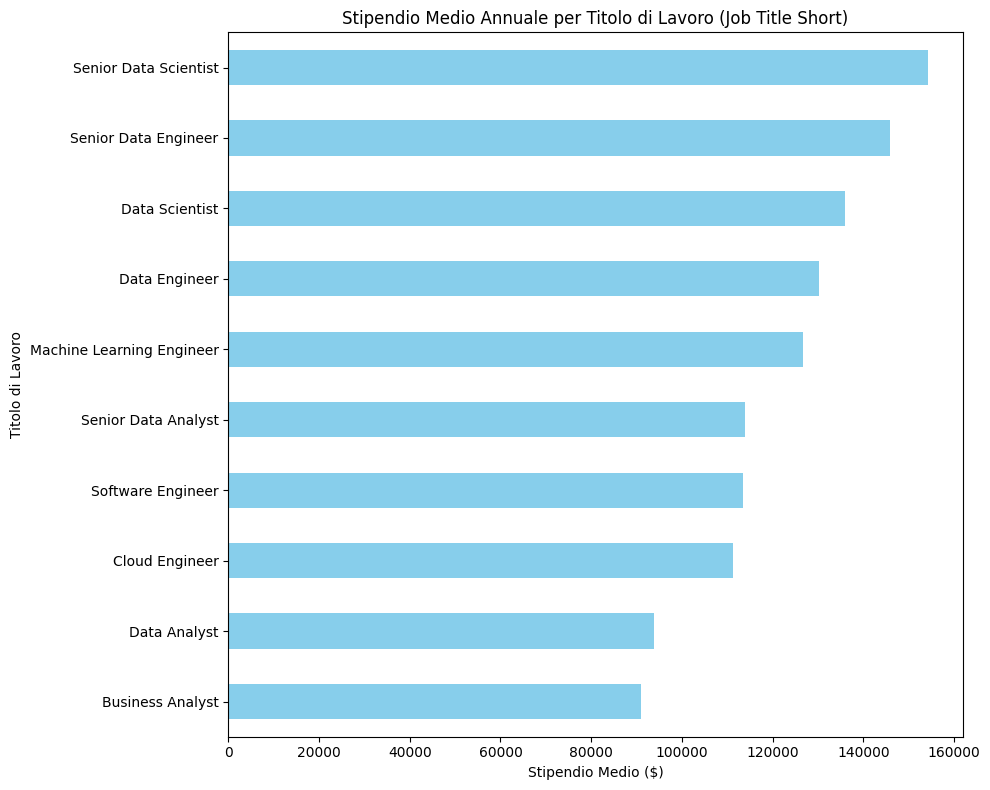

In [23]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Rimuovo righe con NaN in salary_year_avg o job_country
df = df[df['salary_year_avg'].notna() & df['job_country'].notna()]


### Analisi per Paese ###

# 1. Stipendio medio annuale per paese
salary_avg = df.groupby('job_country')['salary_year_avg'].mean().sort_values(ascending=False)

# 2. Numero totale di offerte di lavoro per paese
job_counts = df['job_country'].value_counts()

# 3. Intervallo degli stipendi per paese
salary_range = df.groupby('job_country')['salary_year_avg'].agg(['min', 'max'])

# Unione dei dati in un unico DataFrame riassuntivo
country_stats = pd.concat([salary_avg, job_counts, salary_range], axis=1)
country_stats.columns = ['salary_year_avg', 'job_counts', 'min_salary', 'max_salary']

print("Statistiche per Paese: ")
print(country_stats.sort_values(by='salary_year_avg', ascending=False))


### Grafico ###

# Calcolo stipendio medio per job_title_short
avg_salary_by_title = (
    df.groupby('job_title_short')['salary_year_avg']
    .mean()
    .sort_values(ascending=True) # dal più alto al più basso
)

# Plot orizzontale
plt.figure(figsize=(10, 8))
avg_salary_by_title.plot(kind='barh', color='skyblue')

plt.title('Stipendio Medio Annuale per Titolo di Lavoro (Job Title Short)')
plt.xlabel('Stipendio Medio ($)')
plt.ylabel('Titolo di Lavoro')
plt.tight_layout()
plt.show()
